## Distributional Semantics

### Occurrence Matrix:
### Occurrence is the one which creates a matrix which has context on one axis (document, sentence, tweet, post) and terms (unique word with stop word removal i.e. Vocabulary ) on the other axis.
### Now the value in the matrix could be 0/1 based on the existence of the term in that context/ document. Or it could be frequency of the term in that context. Or it could be more sophisticated tf-idf value of the that term in that context.
### Consider four documents each of which is a paragraph taken from a movie. Assume that your vocabulary has only the following words: fear, beer, fun, magic, wizard.

### The table below summarizes the term-document matrix, each entry representing the frequency of a term used in a movie:
### This is the term frequency matrix. Each cell represent the freq of occurrence of the term in the context

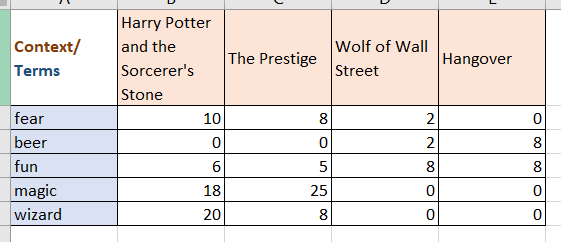

### Application of Occurrence Matrix
### Now if you see one document (which could be tweet) can be represented as a vector of features equal to number of terms.
### e.g. Vector(‘The Prestige’) = 8*’fear’ + 0*’beer’ + 5*’fun’ + 25*’magic’+8*wizard





### Co-occurrence Matrix
### Unlike the Occurrence matrix which is a rectangular matrix, the co-occurrence matrix is a square matrix where it depicts the co-occurrence of two terms in a context. Thus, the co-occurrence matrix is also sometimes called the term-term matrix. It’s a square matrix as the it’s a matrix between each term and another term.
### Typically there are two approaches which are followed
### 1. term-context matrix e.g. Each sentence is represented as a context (there can be other definitions as well). If two terms occur in the same context, they are said to have occurred in the same occurrence context.
### 2. k-skip-n-gram approach e.g. A sliding window will include the (k+n) words. This window will serve as the context now. Terms that co-occur within this context are said to have co-occurred.

### Dis-advantage of term-context matrix is that it will not consider the words which are though close to each other but are in different sentences
### Let’s understand by an example and take following two sentences
### There is a bird sitting on a wall. The cat is sitting on the fence.


### Let’s now look at the k-skip-n-gram matrix and say k=3 and n=2

### 3-skip-2-gram matrix. The co-occurrence will become something like in image below. This will form a sliding window of size 3+2=5 and try to find 2 grams which are no more than 4 words (skip) away.

### term-context co-occurrence matrix





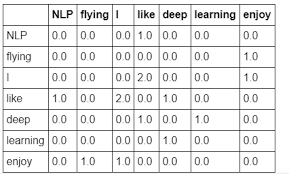

In [51]:
# libraries we'll need
import pandas as pd # dataframes
from io import StringIO # string to data frame
import seaborn as sns # plotting
# read in our data & convert to a data frame
data_tsv = StringIO("""city    province    position
0   Massena     NY  jr
1   Maysville   KY  pm
2   Massena     NY  m
3   Athens      OH  jr
4   Hamilton    OH  sr
5   Englewood   OH  jr
6   Saluda      SC  sr
7   Batesburg   SC  pm
8   Paragould   AR  m""")

my_data_frame = pd.read_csv(data_tsv, delimiter=r"\s+")
my_data_frame.head(2)

city province position
0    Massena       NY       jr
1  Maysville       KY       pm

In [52]:
# conver to co-occurance matrix
co_mat = pd.crosstab(my_data_frame.province, my_data_frame.position)
co_mat

position  jr  m  pm  sr
province               
AR         0  1   0   0
KY         0  0   1   0
NY         1  1   0   0
OH         2  0   0   1
SC         0  0   1   1

<AxesSubplot: xlabel='position', ylabel='province'>

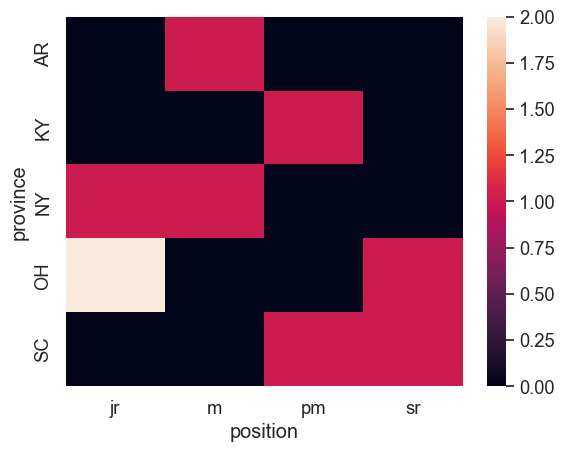

In [53]:
# plot heat map of co-occuance matrix
sns.heatmap(co_mat)

In [54]:
#Word2Vec
#https://www.tensorflow.org/tutorials/text/word2vec
#https://www.kaggle.com/code/vikas15/word-embeddings
#https://www.kaggle.com/code/bulentsiyah/nlp-basics-nltk-skipgram-cbow-reg-exp-stemmer
#https://www.kaggle.com/code/saxinou/word2vec-and-glove


In [55]:
#Loading data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [56]:
true = pd.read_csv("C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/True.csv")
false = pd.read_csv("C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Fake.csv")
true['category'] = 1
false['category'] = 0
true = true.head(500)
false = false.head(500)
df = pd.concat([true,false]) #Merging the 2 datasets
df.shape

(1000, 5)

In [57]:
df.head(2)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   

                 date  category  
0  December 31, 2017          1  
1  December 29, 2017          1

In [58]:
df.category.value_counts()

1    500
0    500
Name: category, dtype: int64

In [59]:
df.subject.value_counts()

politicsNews    500
News            500
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'), Text(1, 0, 'News')]

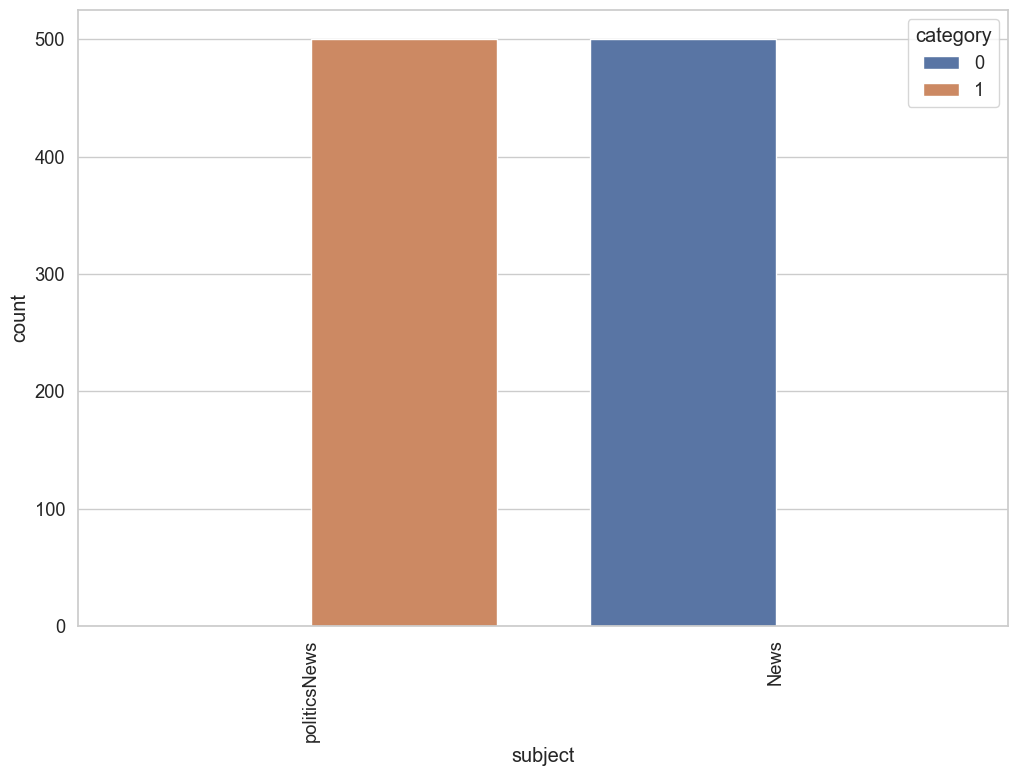

In [60]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [61]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

In [62]:
##DATA CLEANING
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
df['text']=df['text'].apply(denoise_text)
df.head()

text  category
0  WASHINGTON (Reuters) head conservative Republi...         1
1  WASHINGTON (Reuters) Transgender people allowe...         1
2  WASHINGTON (Reuters) special counsel investiga...         1
3  WASHINGTON (Reuters) Trump campaign adviser Ge...         1
4  SEATTLE/WASHINGTON (Reuters) President Donald ...         1

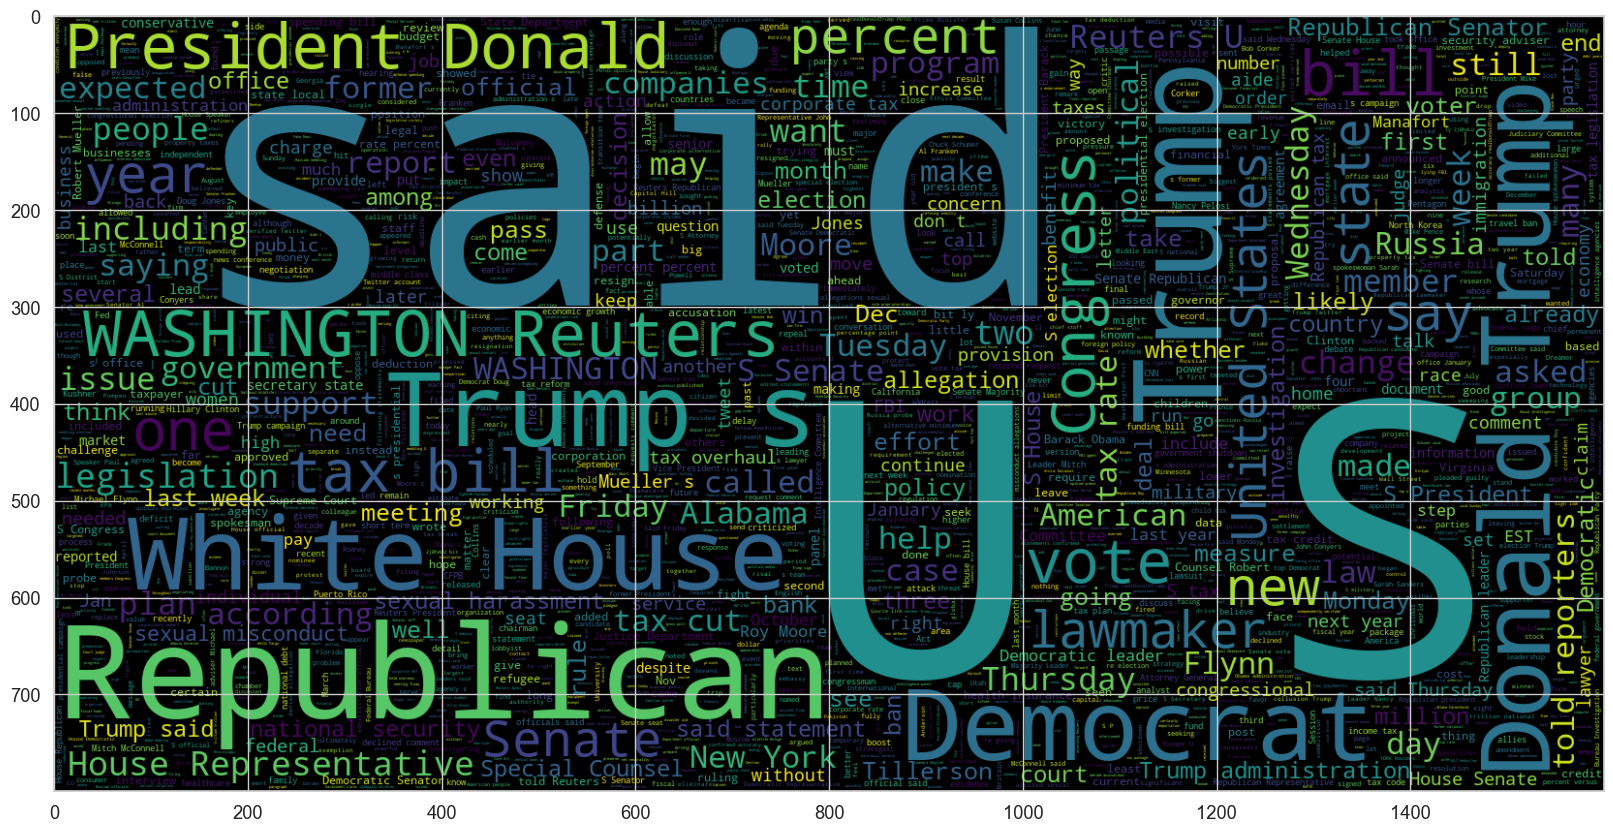

In [63]:
#Real
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

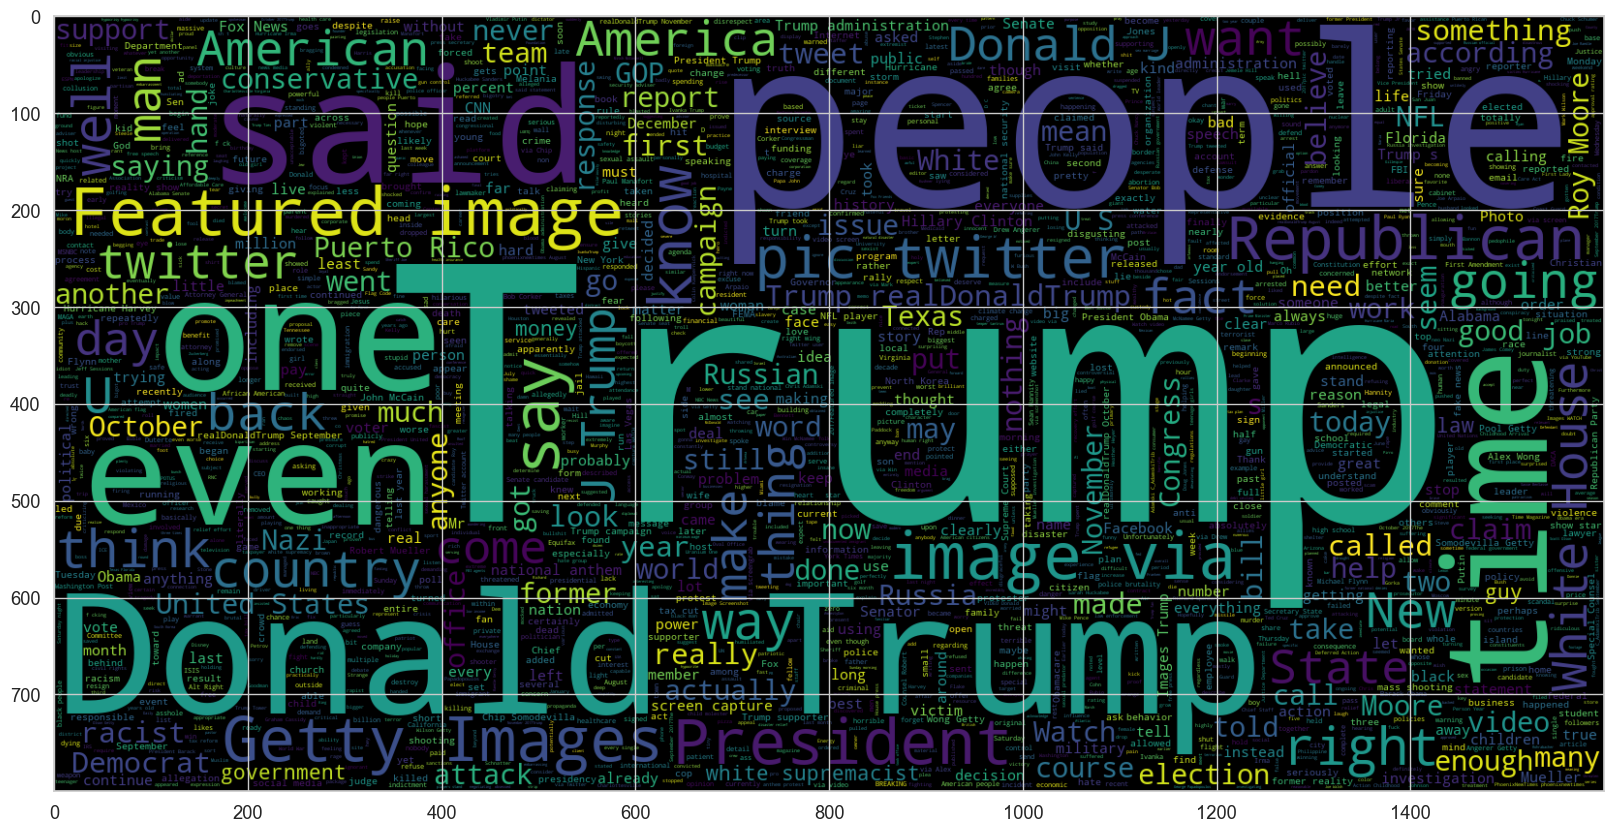

In [64]:
#Fake
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

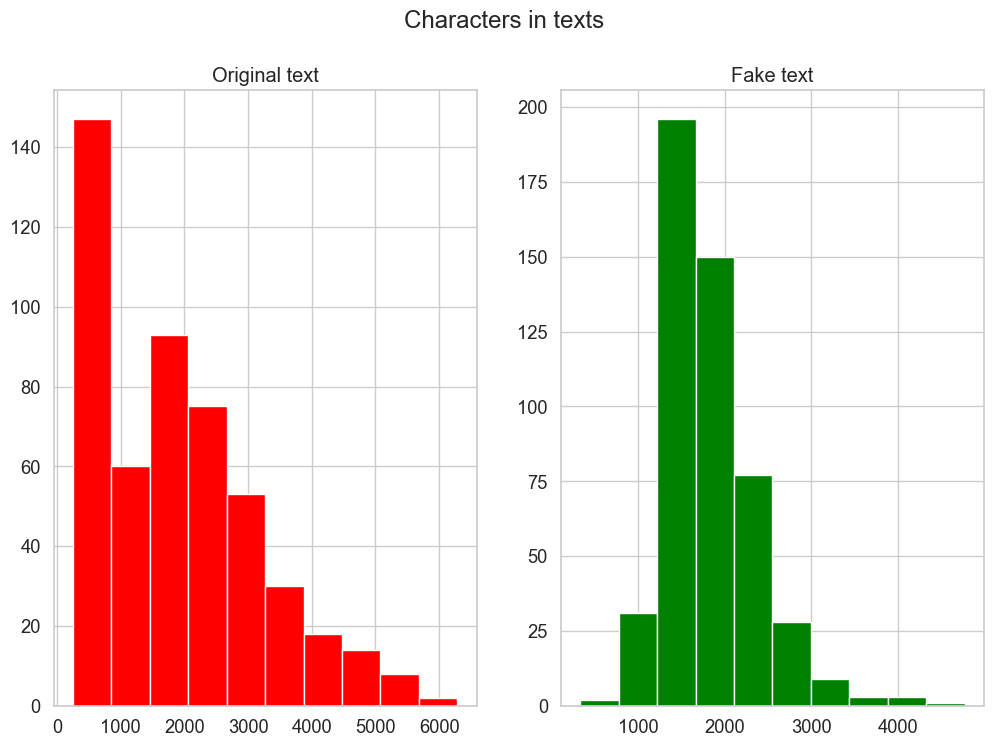

In [65]:
#Number of characters in texts
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10104\2818982191.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10104\2818982191.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

Text(0.5, 0.98, 'Average word length in each text')

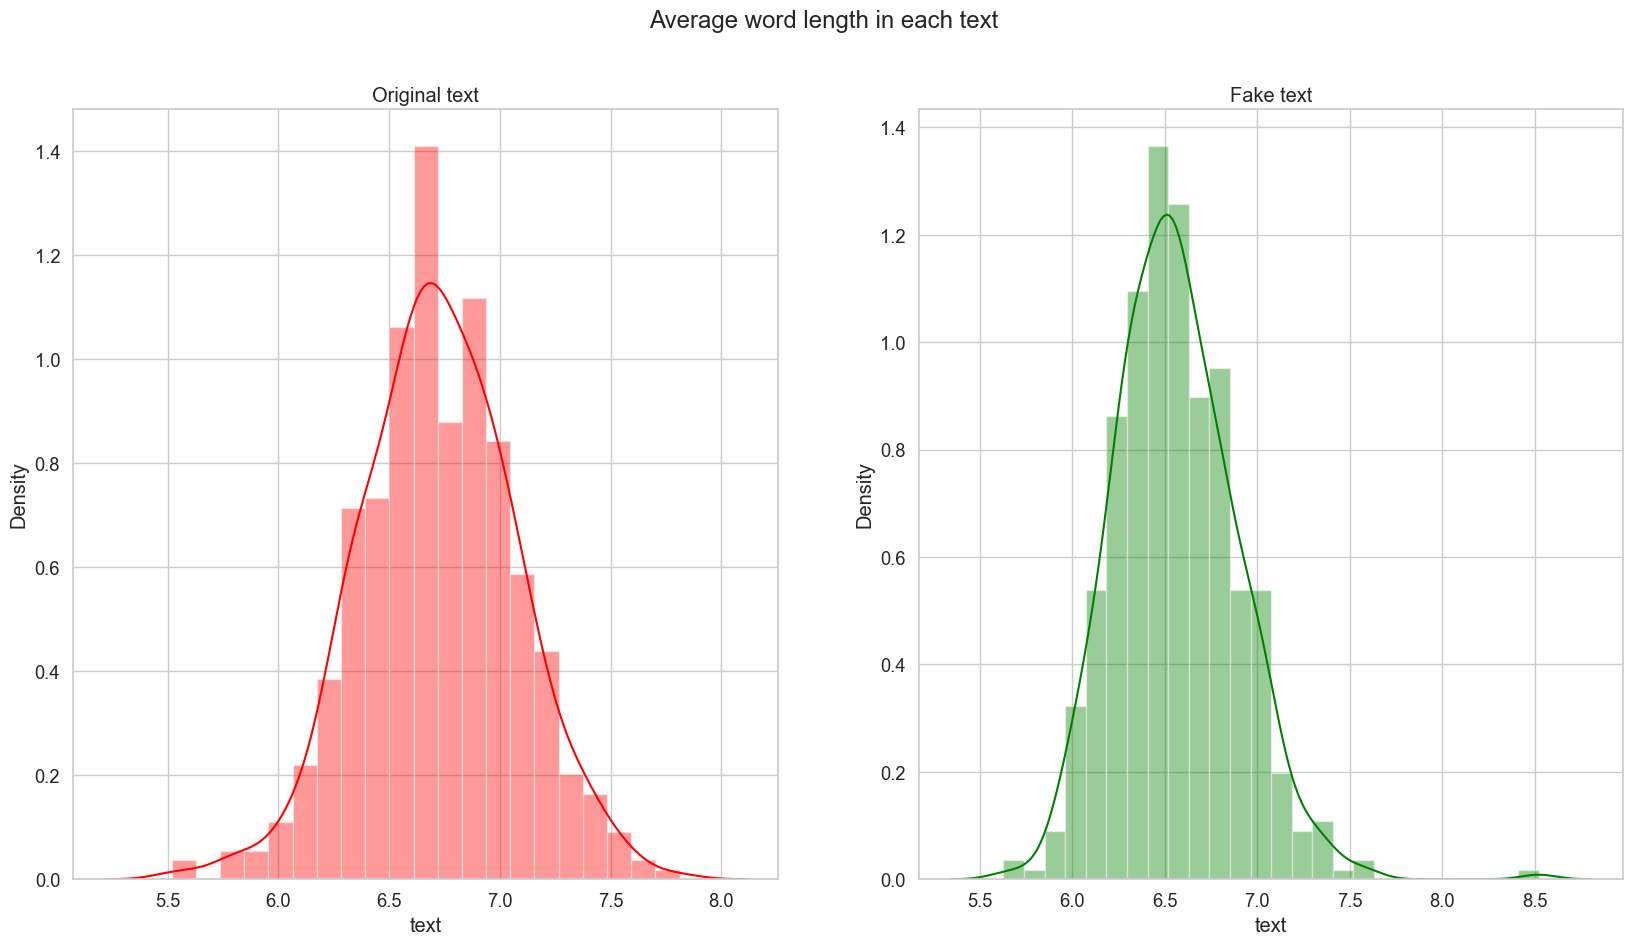

In [66]:
#Average word length in a text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [67]:
print(df.shape)
df.head()

(1000, 2)


text  category
0  WASHINGTON (Reuters) head conservative Republi...         1
1  WASHINGTON (Reuters) Transgender people allowe...         1
2  WASHINGTON (Reuters) special counsel investiga...         1
3  WASHINGTON (Reuters) Trump campaign adviser Ge...         1
4  SEATTLE/WASHINGTON (Reuters) President Donald ...         1

## GloVe:  Global Vectors

### Generate word embeddings by aggregating global word co-occurrence matrices from a given corpus.
### The basic idea behind the GloVe word embedding is to derive the relationship between the words from statistics.  Unlike the occurrence matrix, the co-occurrence matrix tells you how often a particular word pair occurs together. Each value in the co-occurrence matrix represents a pair of words occurring together. 

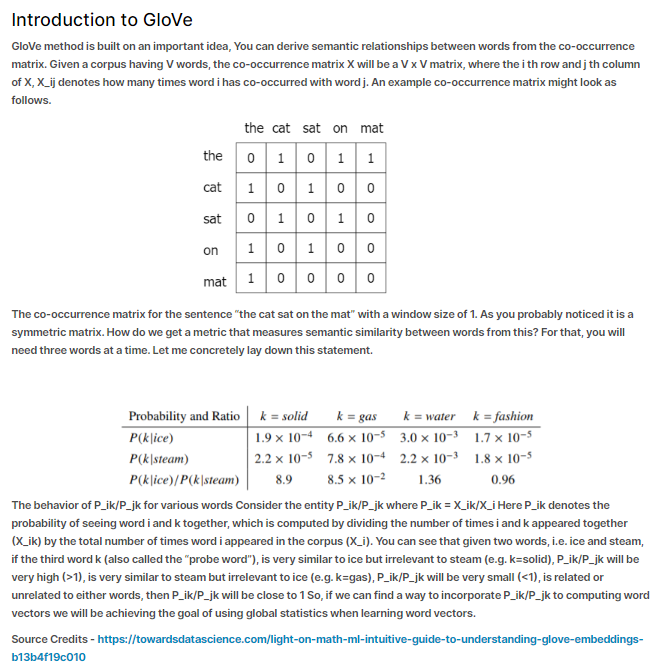

In [68]:
## Making a dictionary of the words and their vector representation

embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/glove/glove.6B.100d.txt', encoding='utf-8') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

In [69]:
glove_df = pd.DataFrame()
for word in df['text']:
    tt = word.split()
    temp_df = pd.DataFrame()
    for i in range(len(tt)):
        try:
            emd = embeddings_dictionary[tt[i]]
            temp_df = temp_df.append(pd.DataFrame([np.array(emd)]),ignore_index=True)
        except:
            pass
    temp_df = pd.DataFrame(temp_df)
    temp_df = pd.DataFrame(temp_df.mean(axis=0)).T
    glove_df = glove_df.append(temp_df,ignore_index=True)

print(glove_df.shape)    
glove_df     

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10104\579819876.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(pd.DataFrame([np.array(emd)]),ignore_index=True)
C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10104\579819876.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glove_df = glove_df.append(temp_df,ignore_index=True)


(1000, 100)


0         1         2         3         4         5         6   \
0   -0.068161  0.182460  0.218463 -0.162132  0.110606 -0.087604 -0.318944   
1    0.114356 -0.017617  0.032755 -0.012924  0.051194  0.112018 -0.333167   
2   -0.089347  0.011691  0.177822 -0.248674  0.090362 -0.000808 -0.125661   
3   -0.032286 -0.141428  0.152545 -0.105160  0.236416  0.009282 -0.014635   
4    0.019179  0.169077  0.169973 -0.095344  0.150573 -0.247200 -0.129330   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.155450  0.070757  0.165417 -0.122103  0.034078  0.084709 -0.115053   
996 -0.029878  0.125807  0.306267 -0.190818 -0.003543  0.155493 -0.142466   
997 -0.006197  0.091634  0.347896 -0.165417  0.020076  0.214111 -0.207401   
998  0.009182  0.079985  0.228346 -0.002257  0.112569  0.048002 -0.336800   
999 -0.033072  0.208139  0.324072 -0.196551  0.016819  0.384878 -0.145819   

           7         8         9   ...        90        91        92  \
0    0.110645 -0.025916  0.010720  ...  0.054693 -0.121703 -0.207719   
1    0.189155  0.003429  0.118018  ... -0.006472 -0.234562 -0.192376   
2    0.032912  0.063190  0.090864  ... -0.010349 -0.070407 -0.143880   
3    0.082272 -0.037494  0.152057  ... -0.010099 -0.121272 -0.144238   
4    0.141936 -0.044654  0.023765  ...  0.011737  0.051099 -0.081359   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.164262 -0.120768 -0.100289  ...  0.059739  0.033754  0.055233   
996  0.095628 -0.017447 -0.086773  ... -0.064174  0.000012 -0.125562   
997  0.128370 -0.019593 -0.024847  ...  0.001945 -0.151307 -0.057800   
998  0.158511  0.031232 -0.053590  ... -0.057273 -0.140920 -0.085058   
999  0.066684  0.006374 -0.126660  ...  0.024505 -0.081506  0.025198   

           93        94        95        96        97        98        99  
0   -0.108298 -0.517933  0.066238  0.093800 -0.033179  0.545226 -0.054639  
1   -0.083106 -0.236289  0.174042 -0.041060 -0.054439  0.357164  0.113790  
2    0.100923 -0.190520  0.135247 -0.084471 -0.064440  0.317444  0.215268  
3    0.086142 -0.176153  0.191238 -0.156633 -0.030061  0.329333  0.062549  
4   -0.213159 -0.459636  0.145815  0.068009 -0.037383  0.511119  0.001666  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.033764 -0.356443  0.087286 -0.105843 -0.140016  0.314963  0.274706  
996 -0.005765 -0.434800 -0.036680 -0.145360 -0.078039  0.339457  0.107447  
997 -0.035285 -0.236168  0.077738 -0.155871 -0.116567  0.341402  0.139599  
998 -0.126874 -0.409625  0.071541  0.063551 -0.073334  0.563834 -0.000669  
999 -0.053965 -0.392833 -0.115340 -0.193704 -0.060180  0.381423  0.282491  

[1000 rows x 100 columns]

In [70]:
df.shape

(1000, 2)

In [71]:
#Common Dimensionality Reduction Techniques:
#1 Missing Value Ratio
#2 Low Variance Filter
#3 High Correlation Filter
#4 Random Forest
#5 Backward Feature Elimination
#6 Forward Feature Selection
#7 Factor Analysis
#8 Principal Component Analysis
#9 Independent Component Analysis
#10 Methods Based on Projections
#11 t-Distributed Stochastic Neighbor Embedding (t-SNE)
#12 UMAP

## Ultimate Guide to 12 Dimensionality Reduction Techniques

In [73]:
# UMAP dimensionality reduction
#https://www.kaggle.com/code/bextuychiev/beautiful-umap-tutorial-on-100-dimensional-data
#https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

In [76]:
glove_df.head()

0         1         2         3         4         5         6   \
0 -0.068161  0.182460  0.218463 -0.162132  0.110606 -0.087604 -0.318944   
1  0.114356 -0.017617  0.032755 -0.012924  0.051194  0.112018 -0.333167   
2 -0.089347  0.011691  0.177822 -0.248674  0.090362 -0.000808 -0.125661   
3 -0.032286 -0.141428  0.152545 -0.105160  0.236416  0.009282 -0.014635   
4  0.019179  0.169077  0.169973 -0.095344  0.150573 -0.247200 -0.129330   

         7         8         9   ...        90        91        92        93  \
0  0.110645 -0.025916  0.010720  ...  0.054693 -0.121703 -0.207719 -0.108298   
1  0.189155  0.003429  0.118018  ... -0.006472 -0.234562 -0.192376 -0.083106   
2  0.032912  0.063190  0.090864  ... -0.010349 -0.070407 -0.143880  0.100923   
3  0.082272 -0.037494  0.152057  ... -0.010099 -0.121272 -0.144238  0.086142   
4  0.141936 -0.044654  0.023765  ...  0.011737  0.051099 -0.081359 -0.213159   

         94        95        96        97        98        99  
0 -0.517933  0.066238  0.093800 -0.033179  0.545226 -0.054639  
1 -0.236289  0.174042 -0.041060 -0.054439  0.357164  0.113790  
2 -0.190520  0.135247 -0.084471 -0.064440  0.317444  0.215268  
3 -0.176153  0.191238 -0.156633 -0.030061  0.329333  0.062549  
4 -0.459636  0.145815  0.068009 -0.037383  0.511119  0.001666  

[5 rows x 100 columns]

In [94]:
import umap
ump = umap.UMAP(random_state=11, n_components=3)
umap_data = ump.fit_transform(glove_df)

In [95]:
import plotly_express as px
px.scatter_3d(x=umap_data[:,0], y=umap_data[:,1], z=umap_data[:,2], title="Distribution after UMAP")

In [96]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=150)
clusterer.fit(glove_df)

HDBSCAN(min_cluster_size=50, min_samples=150)

In [97]:
px.scatter_3d(x=umap_data[:,0], y=umap_data[:,1], z=umap_data[:,2], color=clusterer.labels_.astype(str), title="UMAP => HDBSCAN")

In [ ]:
#https://www.kaggle.com/code/madz2000/nlp-using-glove-embeddings-99-87-accuracy/notebook
#https://www.kaggle.com/code/mahmoudlimam/3d-customer-segmentation-umap-hdbscan
#https://research.aimultiple.com/nlp-use-cases/